**Informe de autómatas celulares** \\
*Estudiante: Gabriel Lías* \\
*CI: 24804344*

# Autómatas celulares

Los autómatas celulares son una colección de células (celdas) que evoluciona en el tiempo (iteracciones o pasos discretos) conforme a un conjuntos de reglas basadas en el estado propio de la célula y el de sus vecinos. Cada célula puede tomar ya sea 2 estados (0 ó 1) ó más

**Autómatas en 1-D**

También llamados autómata celular elemental es el más simple este tiene solo dos posibles valores 
para cada celda (0 ó 1) y las reglas dependen solo de su estado y de sus vecinos más cercanos. La 
regla es aplicada de la siguiente manera:

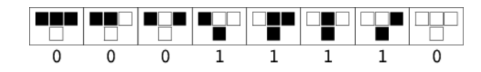

Esta es la regla 30 de Wolfram los números de abajo es la representación del número 30 en binario. Las celdas de abajo muestra como serán si se da la combinación de las tres celdas que se encuentra arriba, por ejemplo, si las tres celdas de la fila de arriba contienen un cero (están en blanco) la salida será una celda con un 1 (celda en negro).

Solo se 
estudian los estados de tres células con solo dos posible estados entonces tenemos 23 = 8 posibilidades, lo cual nos muestra la Figura, a su vez tenemos 28 = 256 reglas disponibles.


Debemos colocar un estado inicial a cada célula y elegir una regla, con esto las autómatas evolucionarán en el tiempo con cada paso discreto en el tiempo

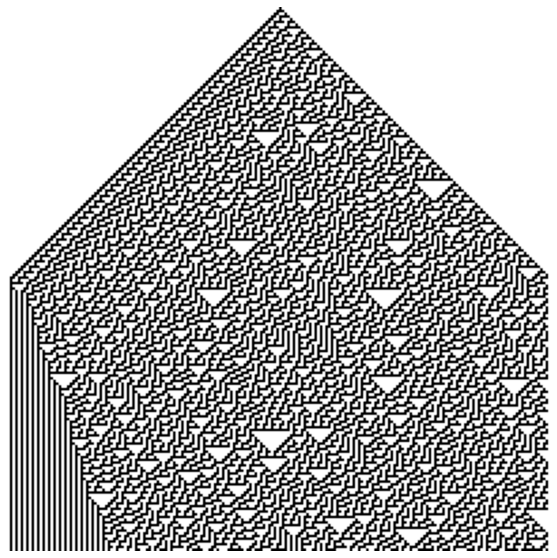

In [ ]:
#Esta clase fue desarrolla en la tarea, la traje aquí para realizar algunas autómatas

import numpy as np
import matplotlib.pyplot as plt

class AC():
    def __init__(self, regla, num_ac, tiempo, cond_init = 'normal', color = 'Greys'):
        self.regla = bin(regla)[2:].zfill(8)
        self.cond_init = cond_init
        self.tiempo = tiempo
        self.N = num_ac
        self.color = color
        
        if self.cond_init == 'normal':
            self.cells = np.zeros((tiempo, num_ac), dtype = int)
            self.cells[0, int(num_ac / 2)] = 1
            

        elif self.cond_init == 'aleatorio':
            a = [np.random.randint(0,2) for n in range(num_ac)]
            self.cells = np.zeros((tiempo, num_ac), dtype = int)
            
            for i in range(num_ac):
                self.cells[0, i] = a[i]
            

        else:
            self.cells = np.zeros((tiempo, num_ac), dtype = int)
            for i in range(len(self.cond_init)):
                self.cells[0,i] = self.cond_init[i] 
            



    def aplicar_regla(self, cell):
        c1, c2, c3 = cell[0], cell[1], cell[2]
        b = c1*4 + c2*2 + c3*1
        new_value = self.regla[::-1][b]
        return new_value

    def make_ac(self):
        for t in range(self.tiempo - 1):
            for i in range(1, self.N - 1):
                grupo = self.cells[t, i - 1: i + 2]
                self.cells[t + 1, i] = self.aplicar_regla(grupo)
                
                                

        plt.figure(figsize=(10,10))
        plt.axis('off')
        plt.imshow(self.cells, cmap = self.color)

AC(30, 200, 200).make_ac()

En este caso coloque como condición inicial una autómata con valor 1 en el centro con las demás celdas en 0, con la regla número 30 

La ﬁlas corresponden a cada generación o tiempo, la primera ﬁla es la generación cero, las siguientes generaciones serán establecidas cuando empiece el proceso de evaluación, cada 
columna corresponde a una autómata. En cada generación se utiliza la configuración de autómatas de la generación anterior como condición inicial y cada una se evalua con la regla escogida, que en este caso es la regla 30.

Así se obtiene un patrón, algunos de estos patrones se ven en la naturaleza, como por ejemplo, en la concha de los caracoles marinos.

# Clasificación de Wolfram

Solo existe 256 reglas de Wolfram y se pueden clasificar en cuatro clases:







## 1.   Clase I (comportamiento uniformes): en  el  tiempo  solo  un  estado  domina  a  los  demás  y  es  así 
para  cualquier  conﬁguración  aleatoria.
Por ejemplo, las reglas 0, 128 y 136, muestran este comportamiento

Regla 0


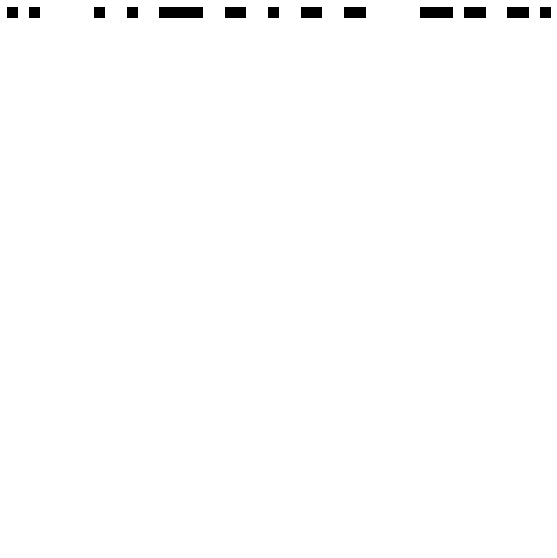

In [ ]:
print('Regla 0')
AC(0, 50, 50, 'aleatorio').make_ac()

Regla 128


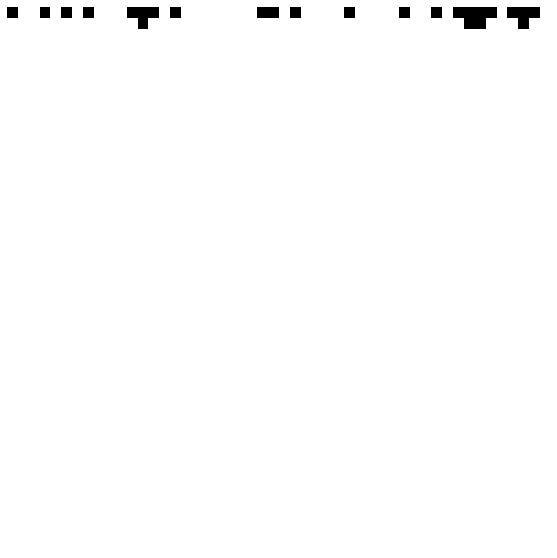

In [ ]:
print('Regla 128')
AC(128, 50, 50, 'aleatorio').make_ac()

Regla 136


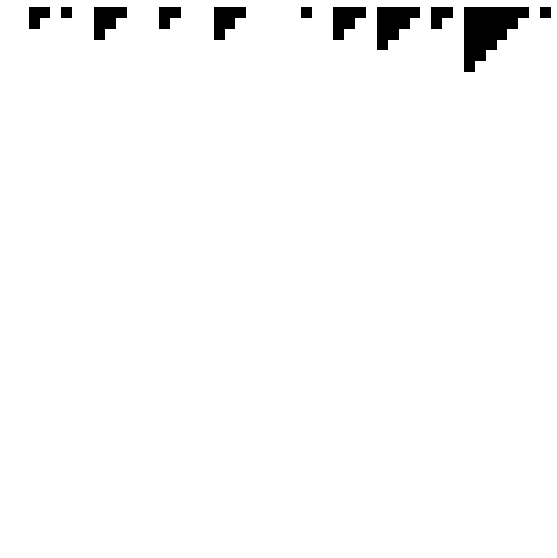

In [ ]:
print('Regla 136')
AC(136, 50, 50, 'aleatorio').make_ac()

Como se ven en la evolución de temporal de las reglas 0, 128 y 136, solo prevalece las autómatas al comienzo de la evolución temporal.

## Clase II (estados cíclicos aislados)

El comportamiento se repite en el tiempo bajo una vecidad dada, es decir, en el tiempo tres automatas estarán en el mismo estado aunque sus estado diﬁeran entre sí.

Algunos ejemplos de reglas que cumplen con este comportamiento son las reglas 12, 220 y 222

Regla 12


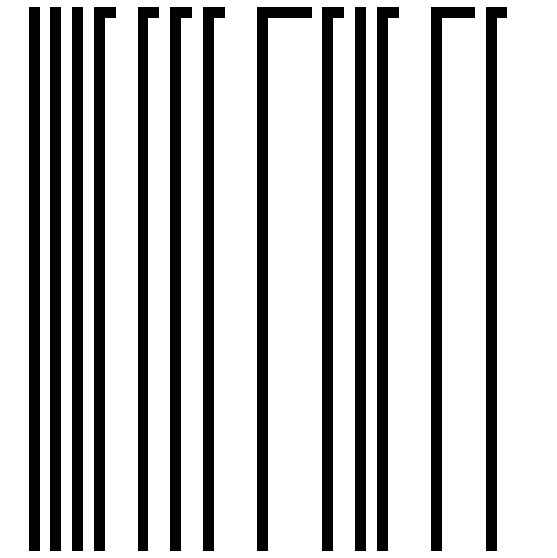

In [ ]:
print('Regla 12')
AC(12, 50, 50, 'aleatorio').make_ac()

Regla 220


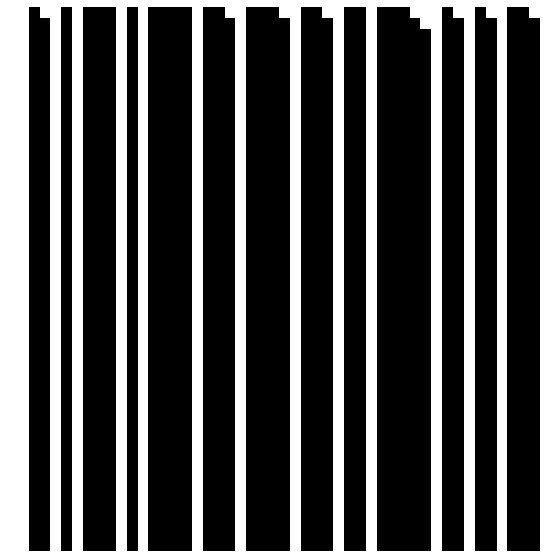

In [ ]:
print('Regla 220')
AC(220, 50, 50, 'aleatorio').make_ac()

Regla 222


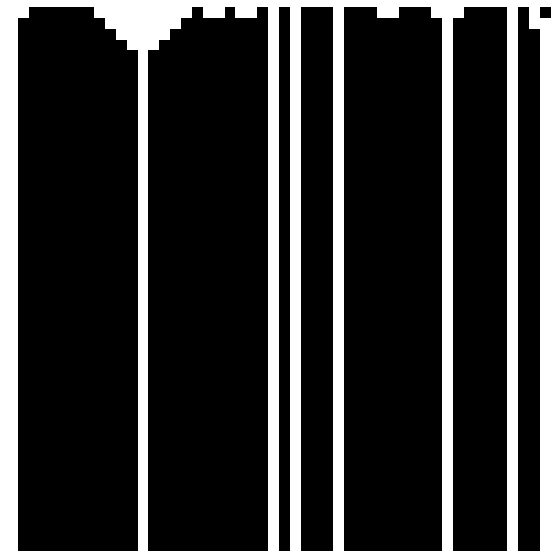

In [ ]:
print('Regla 222')
AC(222, 50, 50, 'aleatorio').make_ac()

Como se ve no se presenta un cambio en la evolución temporal en una vecindad dada. 

## Clase   III   (comportamientos   caóticos)

Los patrones son totalmente   inestables y no se puede determinar a simple  vista que tipo de generación se presentará  de generación en generación.

Algunas reglas que producen una evolución temporal que genera este comportamiento son, la regla 30, 101, 105  

Regla 30


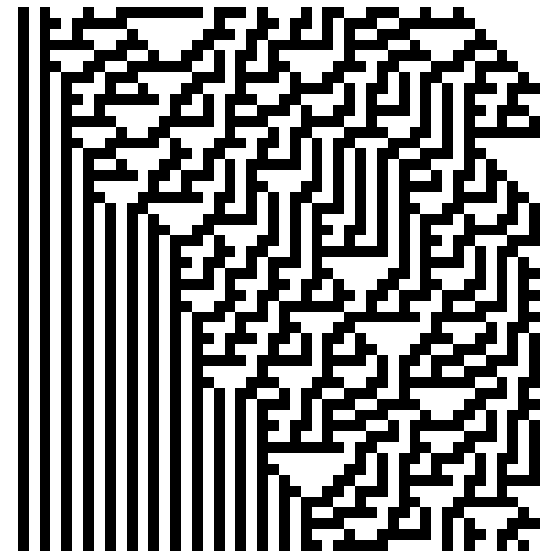

In [ ]:
print('Regla 30')
AC(30, 50, 50, 'aleatorio').make_ac()

Regla 101


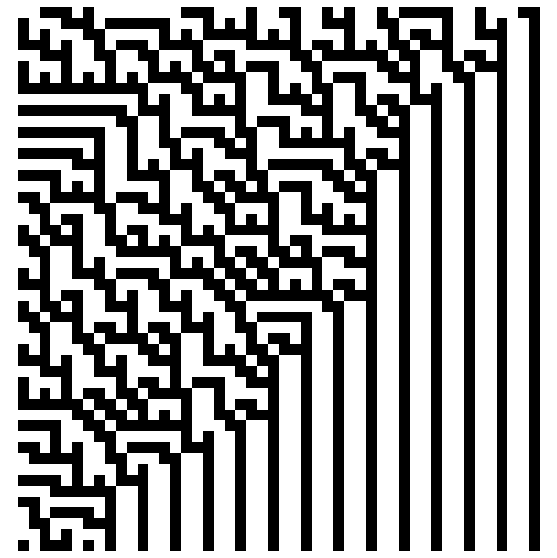

In [ ]:
print('Regla 101')
AC(101, 50, 50, 'aleatorio').make_ac()

Regla 105


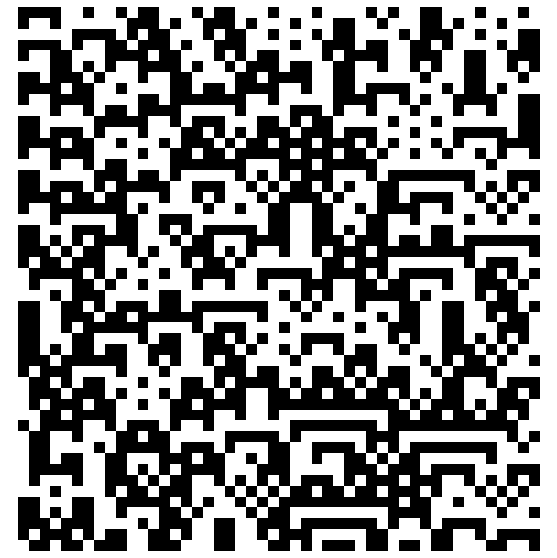

In [ ]:
print('Regla 105')
AC(105, 50, 50, 'aleatorio').make_ac()

Como se ve, los comportamiento de la evolución temporal del sistema es caóticos e impredecibles.

## Clase  IV  (comportamientos  complejos)

Esta clase es una combinación de la Clase II y Clase III, se tienen comportamientos tanto caóticos como cíclicos.

Algunos reglas que producen este comportamiento son las reglas, 169, 193, 225

Regla 169


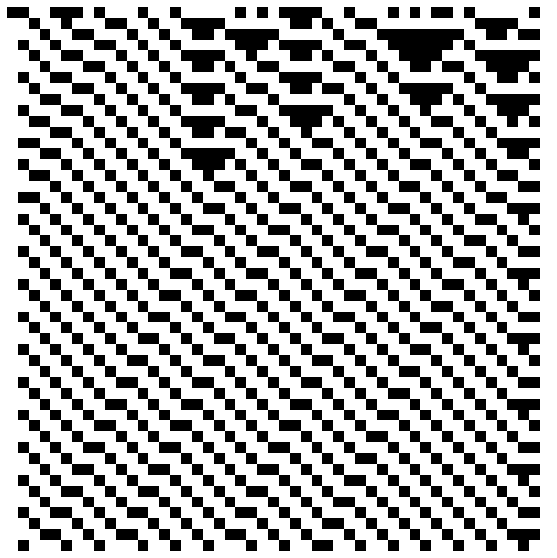

In [ ]:
print('Regla 169')
AC(1169, 50, 50, 'aleatorio').make_ac()

Regla 193


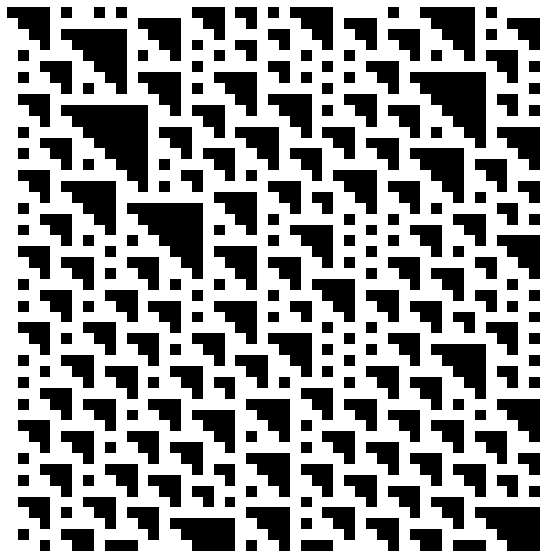

In [ ]:
print('Regla 193')
AC(193, 50, 50, 'aleatorio').make_ac()

Regla 225


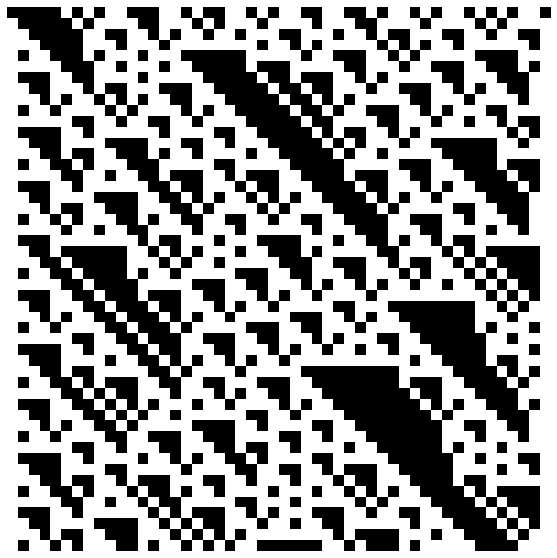

In [ ]:
print('Regla 225')
AC(225, 50, 50, 'aleatorio').make_ac()

Todas las evoluciones de las autómatas celulares se hicieron con la clase AC, desarrollada en la tarea de Autómatas celulares. Para esta demostración utilice 50 autómatas y la evolución discreta del tiempo fue de 50, también se colocó una configuración inicial aleatoria. Se puede hacer cualquier modificación cambiando los parámetros de la clase AC.

# Aplicación de las Autómatas Celulares

Una aplicación para las *autómatas celulares* es la detección de bordes en una imagen, es decir, donde los valores RGB (Red, Green, Blue) de  la imagen   [texto del enlace](https:// [texto del enlace](https://))cambian  superando un cierto umbral.

Funciona con autómatas celulares en 1-D, y en 2-D. Pero en este caso se usará autómatas en 2-D ya que una imagen tiene tanto un alto como un ancho de pixeles, dada una regla que involucra el estado de la célula y la de sus vecinos, la célula bajo evaluación toma un valor binario (0 ó 1), entonces los pixeles donde ocurre un cambio de color tomarán el valor de uno (1) y donde no haya borde  cero (0). Un ejemplo de 
esta aplicación es el siguiente:

 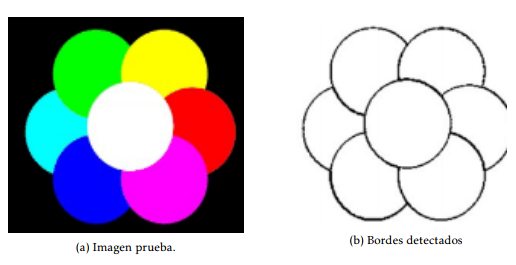

El  estado  de  la  celúla  es  el  conjunto  RGB  del  pixel  que  se  le  ha  asignado  y  se  comparan  estos 
mismos  con  un  umbral  establecido. Si,

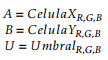

La autómatamarca un borde cuando |A - B| $\geq$ U (umbral). También se considera que vecindad de la célula se toma en consideración, por ejemplo se puede considerar las siguientes vecindades a la hora de usar autómatas celulares para la dectención de bordes.

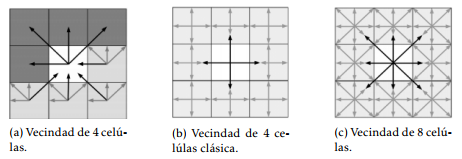

Ahora se implementará autómatas celulares para detectar los bordes de cuatro imágenes. 

Se usará la clase ImageSegment de la tarea de autómatas celulares para detectar los bordes de las imagenes.

Se utilizará primero el valor promedio de los valores RGB de la imagen como punto de partida y se provará las tres vecindades propuesta en la imagen anterior

In [ ]:
class ImageSegment():
    def __init__(self, imagen, R, G, B):
        self.img = plt.imread(imagen) 
        self.R = R
        self.G = G
        self.B = B
        self.row = len(self.img)
        self.column = len(self.img[0])
        self.bordes = np.zeros((self.row, self.column))
        

    def imagen(self):
        plt.figure(figsize = (10, 10))
        plt.axis('off')
        plt.imshow(self.img, cmap = 'gray')

    def draw(self, vecindad = 'propuesta'):
        if vecindad == 'propuesta':
            for y in range(1, self.row - 1):
                for x in range(self.column - 1):

                    centralR = int(self.img[y][x][0])
                    sup_izqR = int(self.img[y-1][x-1][0])
                    sup_cenR = int(self.img[y-1][x][0])
                    sup_derR = int(self.img[y-1][x+1][0])
                    izqR = int(self.img[y][x-1][0])
                    
                    centralG = int(self.img[y][x][1])
                    sup_izqG = int(self.img[y-1][x-1][1])
                    sup_cenG = int(self.img[y-1][x][1])
                    sup_derG = int(self.img[y-1][x+1][1])
                    izqG = int(self.img[y][x-1][1])

                    centralB = int(self.img[y][x][2])
                    sup_izqB = int(self.img[y-1][x-1][2])
                    sup_cenB = int(self.img[y-1][x][2])
                    sup_derB = int(self.img[y-1][x+1][2])
                    izqB = int(self.img[y][x-1][2])

    
                    if abs(centralR - sup_izqR) >= self.R or abs(centralR - sup_cenR) >= self.R or abs(centralR - sup_derR) >= self.R or abs(centralR - izqR) >= self.R or abs(centralG - sup_izqG) >= self.G or abs(centralG - sup_cenG) >= self.G or abs(centralG - sup_derG) >= self.G or abs(centralG - izqG) >= self.G or abs(centralB - sup_izqB) >= self.B or abs(centralB - sup_cenB) >= self.B or abs(centralB - sup_derB) >= self.B or abs(centralB - izqB) >= self.B:
                        self.bordes[y][x] = 0

                    else:
                        self.bordes[y][x] = 1
                            
            plt.figure(figsize = (10,10))
            plt.axis('off')
            plt.imshow(self.bordes, cmap = 'gray')

        elif vecindad == 'clasica-4':
            for y in range(1, self.row - 1):
                for x in range(self.column - 1):

                    centralR = int(self.img[y][x][0])
                    izqR = int(self.img[y][x-1][0])
                    derR = int(self.img[y][x+1][0])
                    arrR = int(self.img[y-1][x][0])
                    abajR = int(self.img[y+1][x][0])
                    
                    centralG = int(self.img[y][x][1])
                    izqG = int(self.img[y][x-1][1])
                    derG = int(self.img[y][x+1][1])
                    arrG = int(self.img[y-1][x][1])
                    abajG = int(self.img[y+1][x][1])

                    centralB = int(self.img[y][x][2])
                    izqB = int(self.img[y][x-1][2])
                    derB = int(self.img[y][x+1][2])
                    arrB = int(self.img[y-1][x][2])
                    abajB = int(self.img[y+1][x][2])
    
                    if abs(centralR - izqR) >= self.R or abs(centralR - derR) >= self.R or abs(centralR - arrR) >= self.R or abs(centralR - abajR) >= self.R or abs(centralG - izqG) >= self.G or abs(centralG - derG) >= self.G or abs(centralG - arrG) >= self.G or abs(centralG - abajG) >= self.G or abs(centralB - izqB) >= self.B or abs(centralB - derB) >= self.B or abs(centralB - arrB) >= self.B or abs(centralB - abajB) >= self.B:
                        self.bordes[y][x] = 0

                    else:
                        self.bordes[y][x] = 1
                            
            plt.figure(figsize = (10,10))
            plt.axis('off')
            plt.imshow(self.bordes, cmap = 'gray')

        elif vecindad == 'clasica-8':
            for y in range(1, self.row - 1):
                for x in range(self.column - 1):

                    centralR = int(self.img[y][x][0])
                    izqR = int(self.img[y][x-1][0])
                    sup_izqR = int(self.img[y-1][x-1][0])
                    inf_izqR = int(self.img[y+1][x-1][0])
                    derR = int(self.img[y][x+1][0])
                    sup_derR = int(self.img[y-1][x+1][0])
                    inf_derR = int(self.img[y+1][x+1][0]) 
                    arrR = int(self.img[y-1][x][0])
                    abajR = int(self.img[y+1][x][0])
                    
                    centralG = int(self.img[y][x][1])
                    izqG = int(self.img[y][x-1][1])
                    sup_izqG = int(self.img[y-1][x-1][1])
                    inf_izqG = int(self.img[y+1][x-1][1])
                    derG = int(self.img[y][x+1][0])
                    sup_derG = int(self.img[y-1][x+1][1])
                    inf_derG = int(self.img[y+1][x+1][1]) 
                    arrG = int(self.img[y-1][x][1])
                    abajG = int(self.img[y+1][x][1])

                    centralB = int(self.img[y][x][2])
                    izqB = int(self.img[y][x-1][2])
                    sup_izqB = int(self.img[y-1][x-1][2])
                    inf_izqB = int(self.img[y+1][x-1][2])
                    derB = int(self.img[y][x+1][2])
                    sup_derB = int(self.img[y-1][x+1][2])
                    inf_derB = int(self.img[y+1][x+1][2]) 
                    arrB = int(self.img[y-1][x][2])
                    abajB = int(self.img[y+1][x][2])
    
                    if abs(centralR - izqR) >= self.R or abs(centralR - sup_izqR) >= self.R or abs(centralR - inf_izqR) >= self.R or abs(centralR - derR) >= self.R or abs(centralR - sup_derR) >= self.R or abs(centralR - inf_derR) >= self.R or abs(centralR - arrR) >= self.R or abs(centralR - abajR) >= self.R or abs(centralG - izqG) >= self.G or abs(centralG - sup_izqG) >= self.G or abs(centralG - inf_izqG) >= self.G or abs(centralG - derG) >= self.G or abs(centralG - sup_derG) >= self.G or abs(centralG - inf_derG) >= self.G or abs(centralG - arrG) >= self.G or abs(centralG - abajG) >= self.G or abs(centralB - izqB) >= self.B or abs(centralB - sup_izqB) >= self.B or abs(centralB - inf_izqB) >= self.B or abs(centralB - derB) >= self.B or abs(centralB - sup_derB) >= self.B or abs(centralB - inf_derB) >= self.B or abs(centralB - arrB) >= self.B or abs(centralB - abajB) >= self.B:
                        self.bordes[y][x] = 0

                    else:
                        self.bordes[y][x] = 1
                            
            plt.figure(figsize = (10,10))
            plt.axis('off')
            
            plt.imshow(self.bordes, cmap = 'gray')

## Homer Simpson

Uso la función fit para tener los valores promedios RGB de la imagen, utilizaré estos valores como punto de partida

In [ ]:
def fit(img):
            #Este es el promedio de R      #Este es el primedio de G         Este es el primedio de B  
    return np.round(np.mean(img[:, :, 0])), np.round(np.mean(img[:, :, 1])), np.round(np.mean(img[:, :, 2]))

Imagen de Homero Simpson


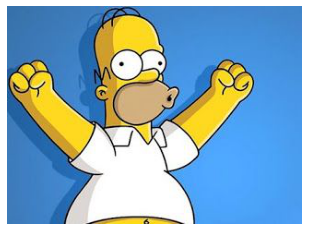

In [ ]:
print('Imagen de Homero Simpson')
homer = plt.imread('/content/Homero Simpson.jpeg')
plt.axis('off')
plt.imshow(homer)

In [ ]:
fit(homer)

(124.0, 162.0, 183.0)

Vecindad de 4 celulas clásica


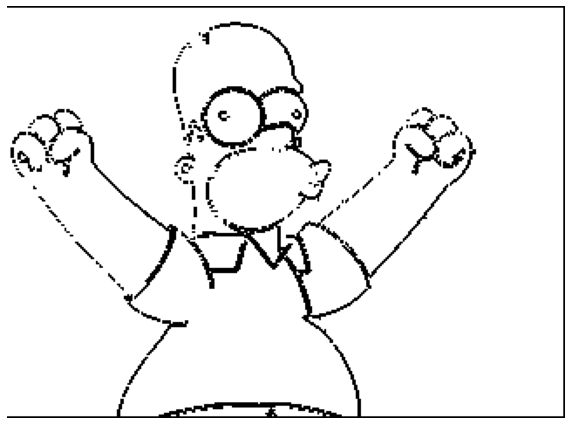

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/Homero Simpson.jpeg', 124, 162, 183).draw('clasica-4')

Vecindad de 4 celulas


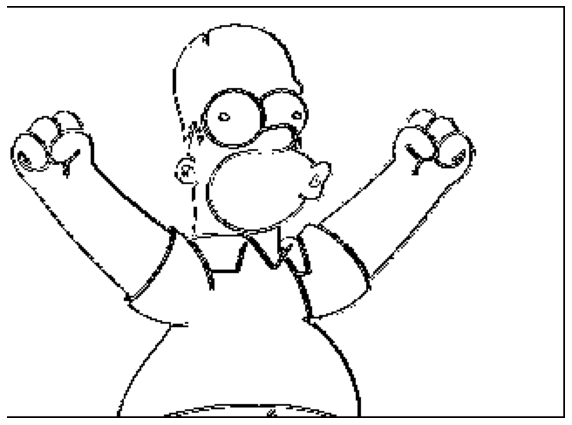

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/Homero Simpson.jpeg', 124, 162, 183).draw('propuesta')

Vecindad de 8 celulas clásica


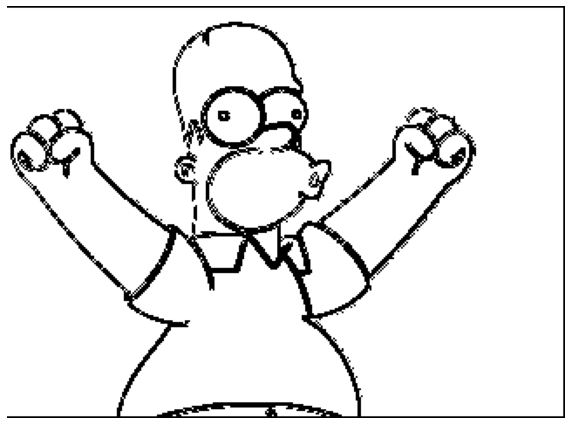

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/Homero Simpson.jpeg', 124, 162, 183).draw('clasica-8')

Ahora se cambia los valores RGB por R = 112, G = 100 y B = 120

Vecindad de 4 celulas clásica


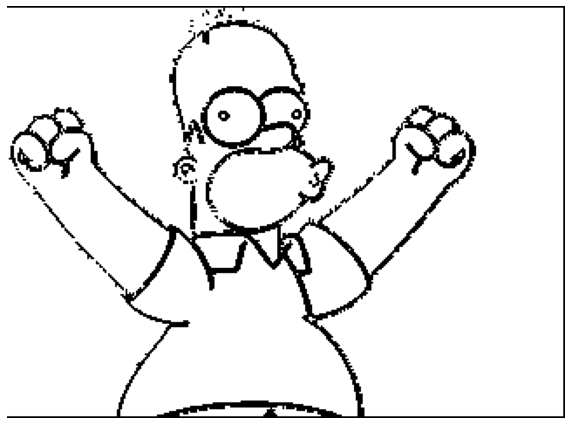

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/Homero Simpson.jpeg', 112, 100, 120).draw('clasica-4')

Vecindad de 4 celulas


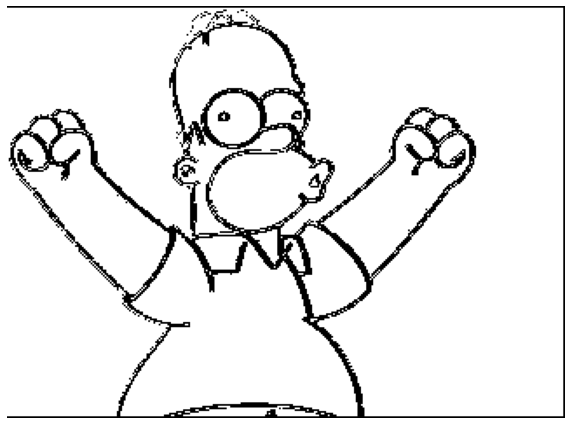

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/Homero Simpson.jpeg', 112, 100, 120).draw('propuesta')

Vecindad de 8 celulas clásica


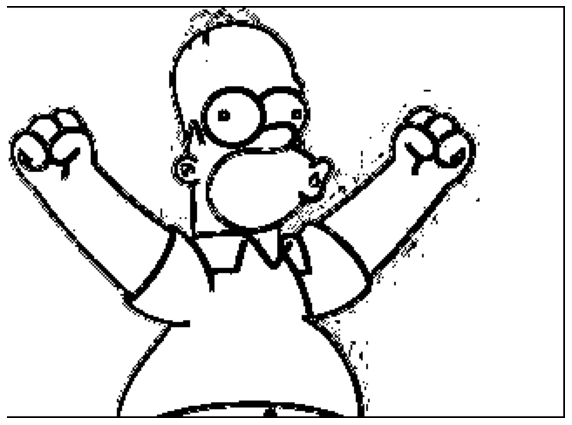

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/Homero Simpson.jpeg', 112, 100, 120).draw('clasica-8')

## Saturno 

Imagen de Saturno


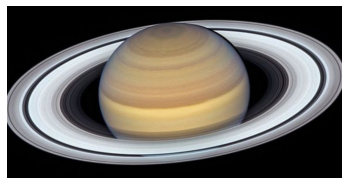

In [ ]:
print('Imagen de Saturno')
saturno = plt.imread('/content/saturno.jpeg')
plt.axis('off')
plt.imshow(saturno)

In [ ]:
# valores RGB promedio
fit(saturno)

(99.0, 94.0, 89.0)

Vecindad de 4 celulas clásica


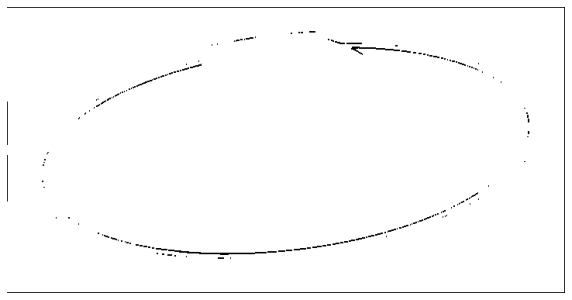

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/saturno.jpeg', 99, 94, 89).draw('clasica-4')

Vecindad de 4 celulas


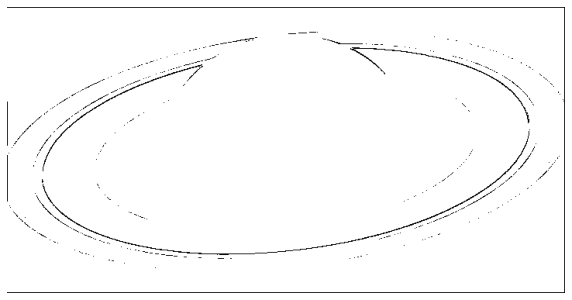

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/saturno.jpeg', 99, 94, 89).draw('propuesta')

Vecindad de 8 celulas clásica


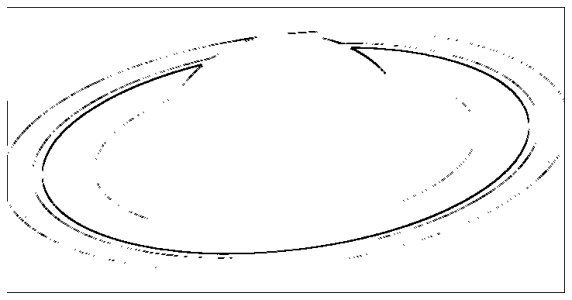

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/saturno.jpeg', 99, 94, 89).draw('clasica-8')

Ahora se cambia los valores RGB por R = 14, G = 14, B = 10

Vecindad de 4 celulas clásica


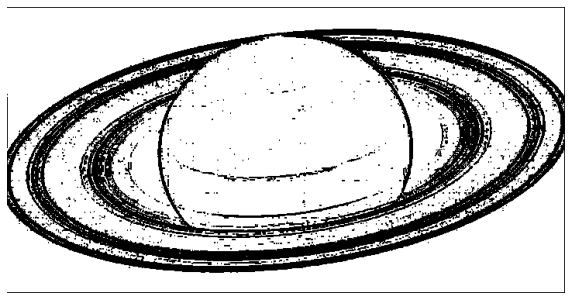

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/saturno.jpeg', 14, 14, 10).draw('clasica-4')

Vecindad de 4 celulas


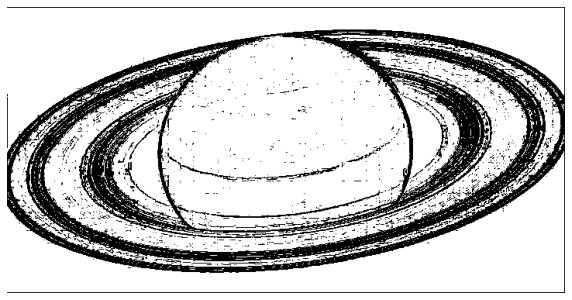

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/saturno.jpeg', 14, 14, 10).draw('propuesta')

Vecindad de 8 celulas clásica


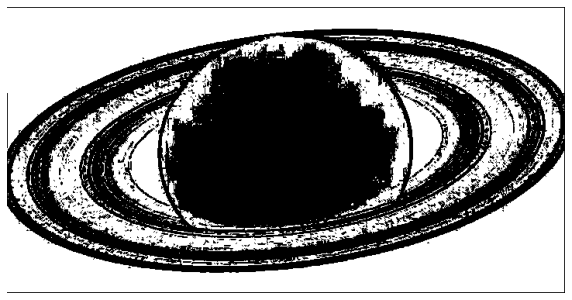

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/saturno.jpeg', 14, 14, 10).draw('clasica-8')

## Esferas con hexagonos

Esfera con hexagonos


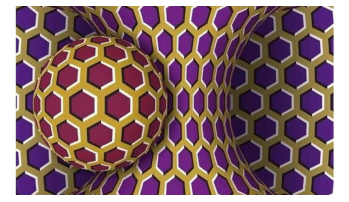

In [ ]:
print('Esfera con hexagonos')
eh = plt.imread('/content/espacio curvo.jpeg')
plt.axis('off')
plt.imshow(eh)

In [ ]:
#Valores promedios de RGB
fit(eh)

(121.0, 89.0, 91.0)

Vecindad de 4 celulas clásica


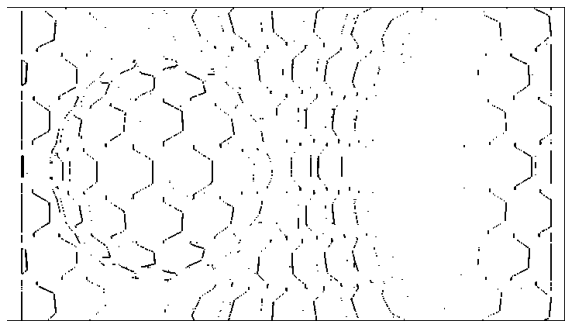

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/espacio curvo.jpeg', 121, 89, 91).draw('clasica-4')

Vecindad de 4 celulas


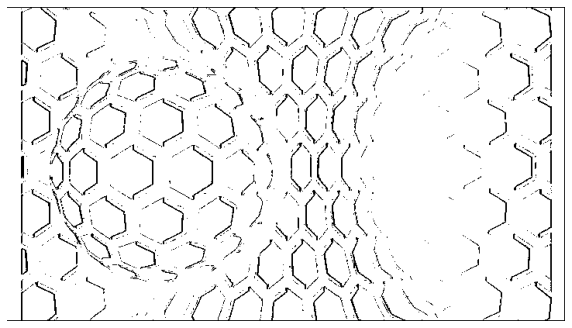

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/espacio curvo.jpeg', 121, 89, 91).draw('propuesta')

Vecindad de 8 celulas clásica


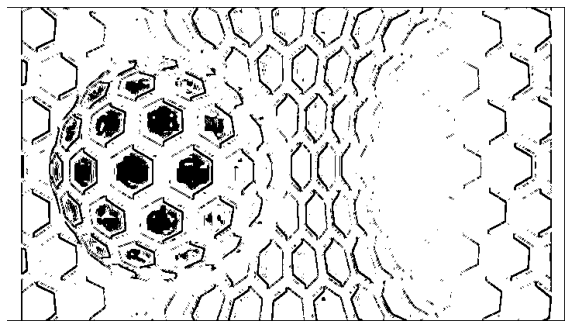

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/espacio curvo.jpeg', 121, 89, 91).draw('clasica-8')

Ahora se cambia los valores de RGB por R = 35, G = 35, B = 35

Vecindad de 4 celulas clásica


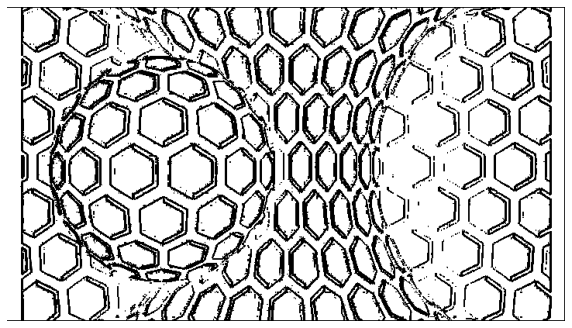

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/espacio curvo.jpeg', 35, 35, 35).draw('clasica-4')

Vecindad de 4 celulas


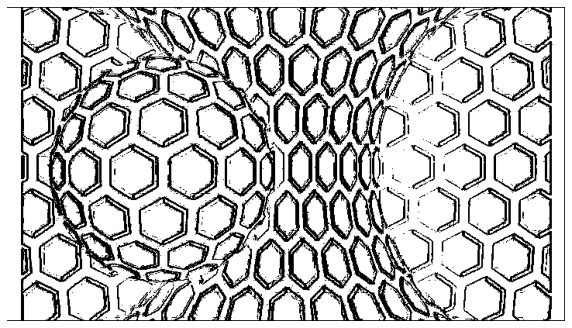

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/espacio curvo.jpeg', 35, 35, 35).draw('propuesta')

Vecindad de 8 celulas clásica


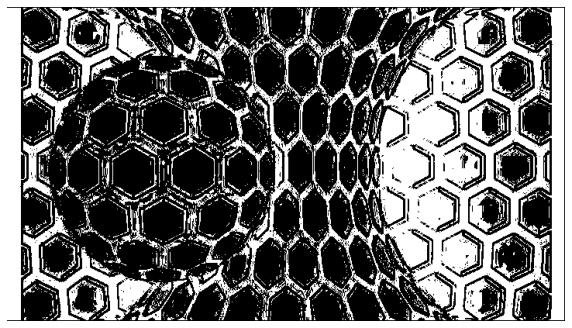

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/espacio curvo.jpeg', 35, 35, 35).draw('clasica-8')

## El rayo

El rayo


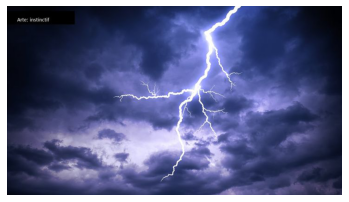

In [ ]:
print('El rayo')
rayo = plt.imread('/content/rayo.jpeg')
plt.axis('off')
plt.imshow(rayo)

In [ ]:
#Valores promedios RGB
fit(rayo)

(69.0, 76.0, 122.0)

Vecindad de 4 celulas clásica


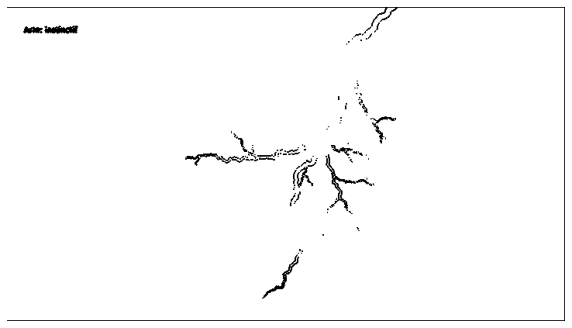

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/rayo.jpeg', 69, 76, 122).draw('clasica-4')

Vecindad de 4 celulas


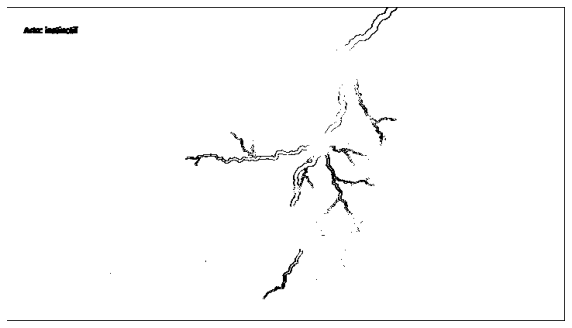

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/rayo.jpeg', 69, 76, 122).draw('propuesta')

Vecindad de 8 celulas clásica


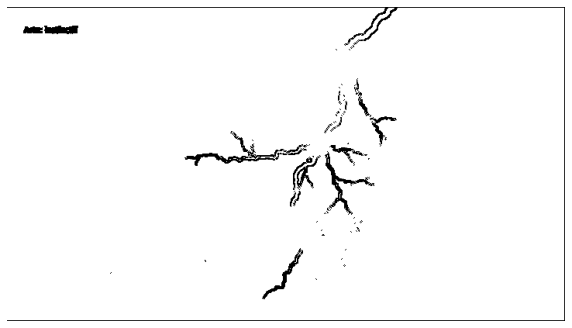

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/rayo.jpeg', 69, 76, 122).draw('clasica-8')

Ahora cambio los valores RGB por R = 20, G = 90, B = 112

Vecindad de 4 celulas clásica


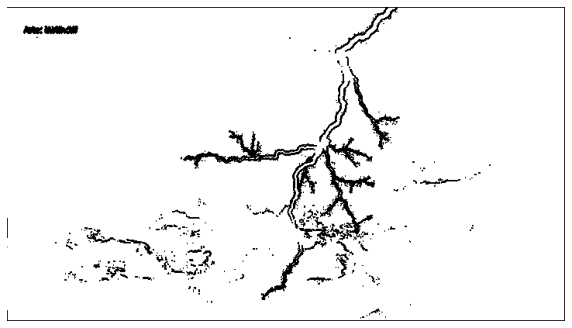

In [ ]:
print('Vecindad de 4 celulas clásica')

ImageSegment('/content/rayo.jpeg', 20, 90, 112).draw('clasica-4')

Vecindad de 4 celulas


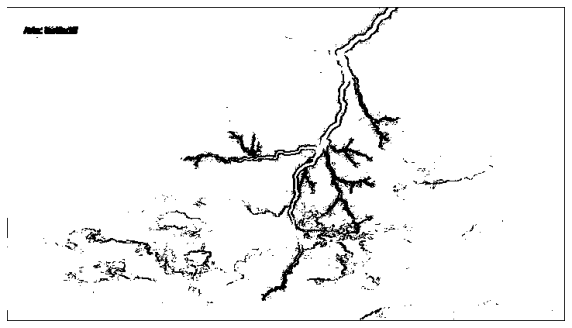

In [ ]:
print('Vecindad de 4 celulas')

ImageSegment('/content/rayo.jpeg', 20, 90, 112).draw('propuesta')

Vecindad de 8 celulas clásica


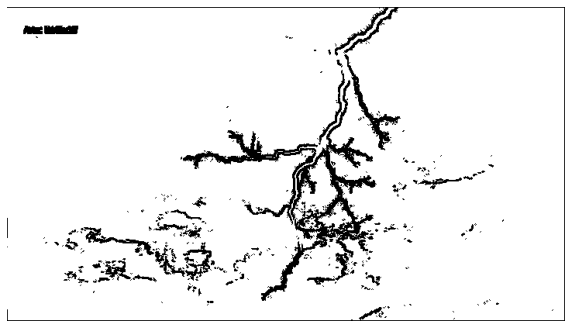

In [ ]:
print('Vecindad de 8 celulas clásica')

ImageSegment('/content/rayo.jpeg', 20, 90, 112).draw('clasica-8')

## Conclusión 

Como se observó al tomar la vencidad de 4 celdas clásicas  se obtuvo bordes claron en la imágenes debido a que al tomar las 4 celdas adyacente a la célula en consideración se repetian algunos valores al cambiar a la siguiente celda. 

En el caso de la vecindad de 8 celdas clásica se obtuvieron imágenes oscuras, ya que al consideras las 8 celdas adyancetes a la celda en consideración se repetian más los valores de la diferencia al pasar a la siguiente celda. 

Con la vecindad de 4 celdas, se obtuvo una mejor detención de bordes, porque no se repetian muchos los valores cuando se pasaba a la siguiente celda.

Además al considerar el valor promedio de RGB de la imagen se obtuvo una idea de como sería el umbral para la deteción de bordes, al disminuir el umbral la autómata celular pudo captar mejor los cambios de colores.